<center> <h1>Python Tutorial</h1> </center>
<center> <h2>Solar Alma Library of Auxiliary Tools (SALAT)</h2> </center>

SALAT is a collection of Python (and IDL) routines which make easy to handle ALMA datasets of solar observations. It can be used to perform a quick inspection of the data.

This tutorial shows how to use the different routines include within SALAT. 

The test datasets used in this notebook can be found in [here](https://github.com/SolarAlma/SALAT/tree/main/test_data#readme). For the particular use in this notebook, they have been locally stored.

<div class="alert alert-block alert-warning"><b>Warning: **Please be aware that this tool does not exempt the user of their responsability when interpreting the scientific outcome of the data! </b>

In [1]:
import salat

## Datasets
This tutorial makes use of 4 different datasets:
> 3 observations

> 1 simulation

In [2]:
path_folder = '/Users/juancg/Documents/2021/SALAT/test_data_salat/'
file1 = path_folder+"solaralma.b3.fba.20161222_141931-150707.2016.1.00423.S.level4.k.fits"
file2 = path_folder+"solaralma.b6.fba.20170422_155917-164326.2016.1.00050.S.level4.k.fits"
file3 = path_folder+"solaralma.b6.fba.20170328_150920-161212.2016.1.00788.S.level4.k.fits"

## READ_FITS

The FITS cube can be loaded as follows:

&nbsp; &nbsp; 1. All the possible variables are returned:

> datacube as array (It is loaded always)

> header as original structure

> time in seconds from midnight as array

> time as datetime

> beam major axis as array

> beam minor axis as array

> beam angle as array

&nbsp; &nbsp; &nbsp; 2. Only individual or gropus of variable are loaded, for example making timeout=True and the other parameters = False

In [3]:
#FITS cube is loaded and all possible variables are returned
almacube1,header1,timesec1,timeutc1,beammajor1,beamminor1,beamangle1 = salat.salat_read(file1,timeout=True,beamout=True,HEADER=True,SILENT=False)

 28%|██▊       | 342/1200 [00:00<00:00, 3416.58it/s]


---------------------------------------------------
--------------- SALAT READ part of ----------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --

Reading ALMA cube



100%|██████████| 1200/1200 [00:00<00:00, 3333.20it/s]


---------------------------------------------------
--------------- SALAT INFO part of ----------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --


----------------------------------------------
| Data feat.: 
----------------------------------------------
|  ALMA BAND:  3
|  Obs. Date:  2016-12-22
|  ALMA proj:  2016.1.00423.S
|  Pix. Unit:  K
|  Pix. Size:  0.32  arcsec.
|  Beam mean:  6242.723999999999  arcsec
|  FOV. diam:  notcomputed
----------------------------------------------
| Data range 
----------------------------------------------
|  Min =  4573.09  Kelvin
|  Max =  10635.5  Kelvin
----------------------------------------------

Done!


## READ_HEADER
There are 3 possible ways of obtaining the header.

> The most meagninful keywrods are reutrned in a structure with meagninful keywords

> The most meagninful keywrods are reutrned in a structure with original keywords

> The original header in original format is returned


In [4]:
#FITS header is read and pass to a Class structure with new meaningful keywords
hdrmk = salat.salat_read_header(file1,ALL=False,ORIGINAL=False,)
hdrmk


---------------------------------------------------
------------ SALAT READ HEADER part of ------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --

  
 --------------------------------------------------
 |  Selected parameters from the header:
 --------------------------------------------------
 |  Time of observations:  2016-12-22T14:19:36.623999
 |  ALMA Band:  BAND3
 |  ALMA Project ID:  2016.1.00423.S
 |  Solar x (arcsec) ~  -0.001
 |  Solar y (arcsec) ~  0.001
 |  Pixel size (arcsec):  0.32
 |  Mean of major axis of beam (deg):  0.000583749
 |  Mean of minor axis of beam (deg):  0.000379633
 |  Mean of beam angle (deg):  0.000583749
 |  Frequency (Hz):  99990725896.68
 |  Water Vapour:  1.598
 ---------------------------------------------------
  


define_header(major_beam_mean=0.000583749, minor_beam_mean=0.000379633, beam_angle_mean=71.31184387207, RA=271.2488635455, Dec=-25.42327076764, Frequency=99990725896.68, solarx=-0.001, solary=0.001, Rest_frequency=93000000000.1, DATE_OBS='2016-12-22T14:19:36.623999', ALMA_Band='BAND3', min_of_datacube=4573.09, max_of_datacube=10635.5, ALMA_project_id='2016.1.00423.S', water_vapour=1.598, pixel_size=0.32)

In [5]:
#FITS header is read and pass to a Class structure with original keywords
#SILENT=True to avoid printing
hdrok = salat.salat_read_header(file1,ALL=False,ORIGINAL=True,SILENT=True)
hdrok

define_header(BMAJ=0.000583749, BMIN=0.000379633, BPA=71.31184387207, CRVAL1=271.2488635455, CRVAL2=-25.42327076764, CRVAL3=99990725896.68, CRVAL1A=-0.001, CRVAL2A=0.001, RESTFRQ=93000000000.1, DATE_OBS='2016-12-22T14:19:36.623999', INSTRUME='BAND3', DATAMIN=4573.09, DATAMAX=10635.5, PROPCODE='2016.1.00423.S', PWV=1.598, CDELT1A=0.32)

In [6]:
#FITS header is read and returned in original format
hdroh = salat.salat_read_header(file1,ALL=True,SILENT=True)

## SALAT STATS

This function shows some useful stats for the array used as input. This array can be the complete cube, only a group of frames or one unique frame. If Histogram = True then it also plot the histogram distribution of temperatures for the input array.

The output is a dictionary with the stats. 


---------------------------------------------------
--------------- SALAT STATS part of ----------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --

Computing Statistics

----------------------------------------------

----------------------------------------------
|  Statistics: 
----------------------------------------------
|  Array size: t = 1200 x = 213  y = 213
|  Min =  4573.08642578125
|  Max =  10635.462890625
|  Mean =  7387.675114081175
|  Median =  7327.32373046875
|  Mode =  7305.5439453125
|  Standard deviation =  518.919333625818
|  Variance =  269277.274810663
|  Skew =  0.5515735886224322
|  Kurtosis =  0.7880637528361976
|  Percentile 1 =  [6318.5185498  8812.49609375]
|  Percentile 5 =  [6645.40478516 8361.46972656]
----------------------------------------------



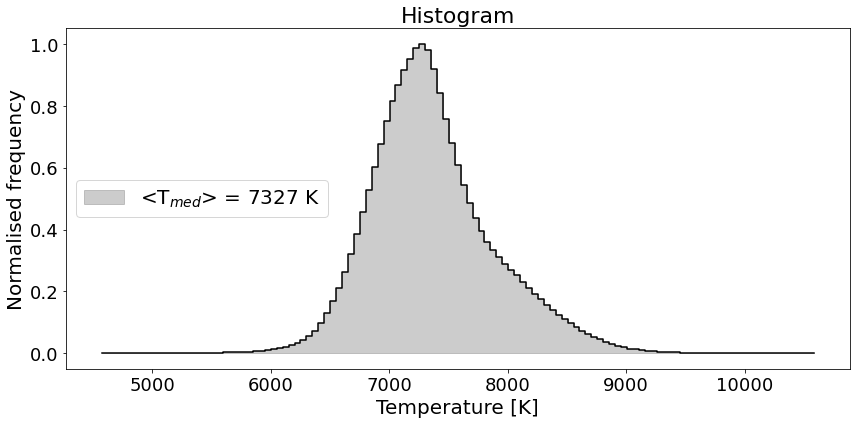

In [7]:
stats = salat.salat_stats(almadata=almacube1,Histogram=True,SILENT=False)

## SALAT TIMELINE
This function displays a plot that shows the time gaps within the observation timeline. The gap to considere frame as part of a new scan is by default 30 frames but it can be customized as well.

This function returns 2 dictionaries. First with indixes for the scans. Second with indixes of consequent frames


---------------------------------------------------
------------- SALAT TIME LINE part of -------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --



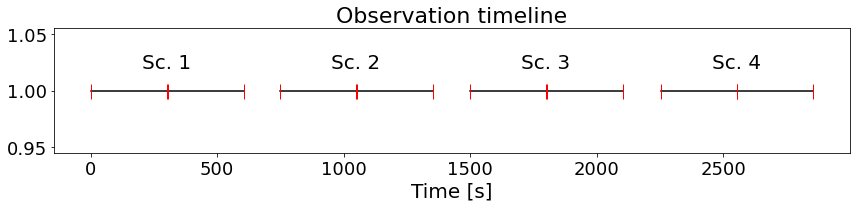

Indexes scans:  {'Sc. 1': [0, 299], 'Sc. 2': [300, 599], 'Sc. 3': [600, 899], 'Sc. 4': [900, 1199]}
Indexes consequent frames:  {'Sec. 1': [0, 149], 'Sec. 2': [150, 299], 'Sec. 3': [300, 449], 'Sec. 4': [450, 599], 'Sec. 5': [600, 749], 'Sec. 6': [750, 899], 'Sec. 7': [900, 1049], 'Sec. 8': [1050, 1199]}


In [8]:
idxscans,idxcqfrs = salat.salat_timeline(timesec1,gap=25)
print("Indexes scans: ", idxscans)
print("Indexes consequent frames: ",idxcqfrs)

## SALAT INFO

This function print out basic information for the datase

In [9]:
salat.salat_info(file1)

---------------------------------------------------
--------------- SALAT INFO part of ----------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --


----------------------------------------------
| Data feat.: 
----------------------------------------------
|  ALMA BAND:  3
|  Obs. Date:  2016-12-22
|  ALMA proj:  2016.1.00423.S
|  Pix. Unit:  K
|  Pix. Size:  0.32  arcsec.
|  Beam mean:  6242.723999999999  arcsec
|  FOV. diam:  notcomputed
----------------------------------------------
| Data range 
----------------------------------------------
|  Min =  4573.09  Kelvin
|  Max =  10635.5  Kelvin
----------------------------------------------



## SALAT PLOT_MAP

This function makes a plot for one frame or averaged frame using as inputs the outputs from read function. The pixelsize can be extracted from hdr, for example pxsize=hdr.

---------------------------------------------------
------------ SALAT PLOT MAP part of ---------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --



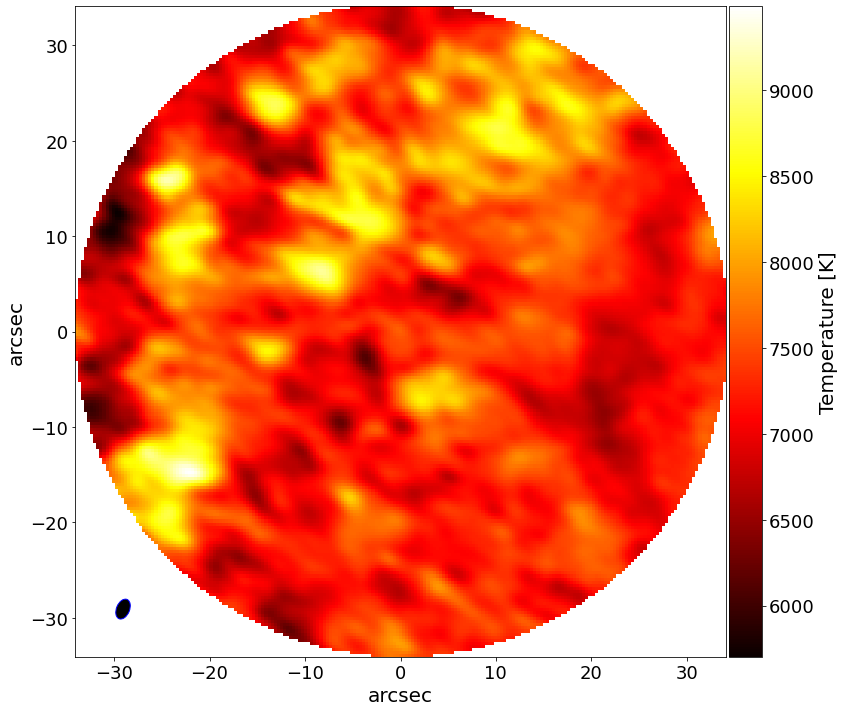

In [10]:
salat.salat_plot_map(almacube1,pxsize=hdrmk.pixel_size,beam=[beammajor1,beamminor1,beamangle1])

## SALAT BEAM_STATS

This function uses beam information to show some statistics. If plot=True then it makes a plot of the beam area with time


---------------------------------------------------
------------ SALAT BEAM STATS part of -------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --

Computing Statistics

---------------------------------------------------

----------------------------------------------
|  Beam Statistics: 
----------------------------------------------
|  Min (major,minor,angle,area) =  (2.0301436772570014, 1.3583892490714788, 67.04122, 2.1699882237884673)
|  Max (major,minor,angle,area) =  (2.1893782541155815, 1.3740585884079337, 68.90729, 2.3556596243785903)
|  Mean (major,minor,angle,area) =  (2.101498652540613, 1.3666819556965493, 68.04936, 2.2558125338146087)
|  Median (major,minor,angle,area) =  (2.097920689266175, 1.367768389172852, 68.129944, 2.252857507134082)
|  Standard deviation (major,minor,angle,area) =  (0.046229713450479264, 0.004009421305141309, 0.5219541, 0.05374611320453778)
----------------------------------------------



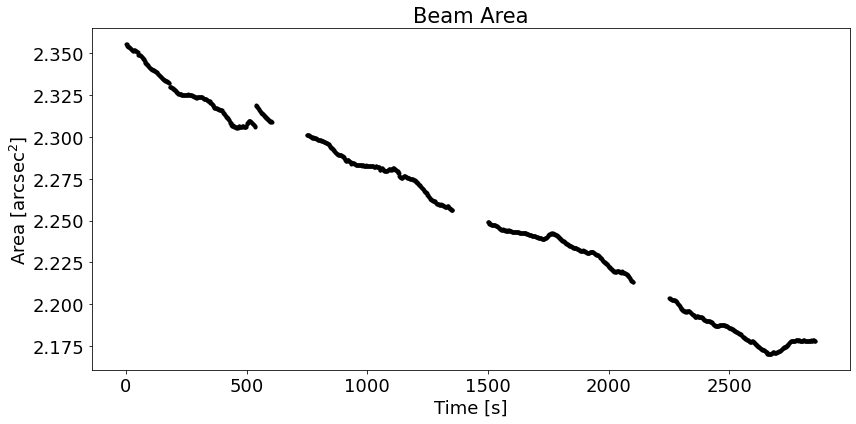

In [11]:
salat.salat_beam_stats(beammajor1,beamminor1,beamangle1,timesec1,plot=True)

## SALAT CONTRAST
Compute and plot "mean intensity" and "rms intensity contrast" of a cube and indicate bad/good frames based on a given threshold. Gaps (due to ALMA calibration routines) are marked with Red dashed lines.

It returns a sorted array with the indexes of best frames


---------------------------------------------------
------------ SALAT CONTRAST part of -------------
-- Solar Alma Library of Auxiliary Tools (SALAT) --



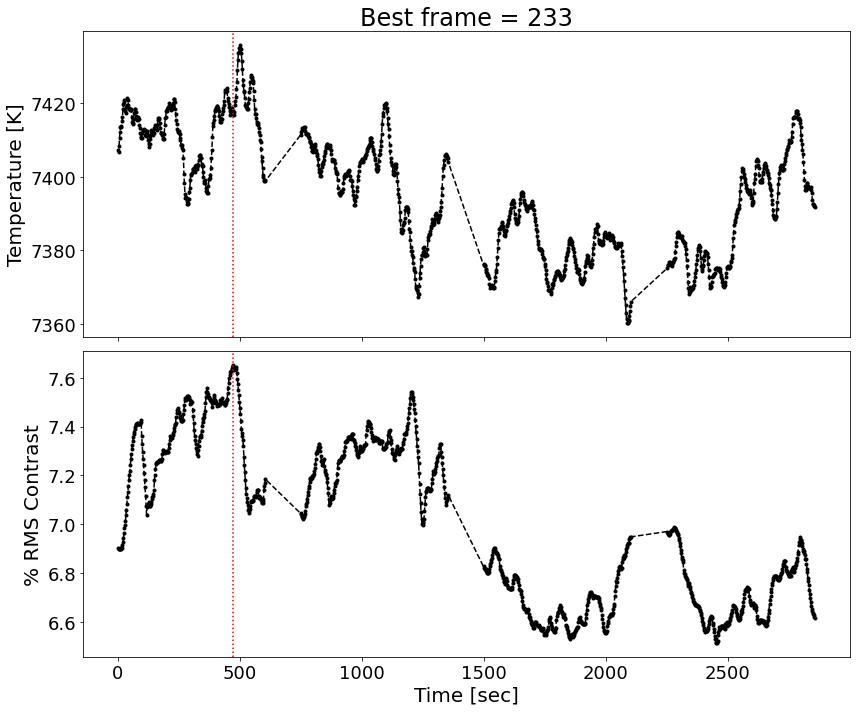

In [12]:
idxbestfr = salat.salat_contrast(almacube1,timesec1,show_best=True)

## SALAT CONVOLVE_BEAM

To illustrate how this function works, one bifrost frame described in [here](https://github.com/SolarAlma/SALAT/tree/main/test_data#readme) is convolved with the beam from this observation.

The function uses the average beam size. Although a customized beam can be input. 

If the convolution of many frames is desired the process must be iterative.

This function can take some time as it depends on the size of the data and the pixelsize.

A plot to show the difference between the original and the convolved is made.

In [13]:
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
filebifrost = path_folder + "bifrost_b3_frame400.fits"
bifrostdata = fits.open(filebifrost)[0].data
pxsizebifrost = 0.06 #This is assumed

In [15]:
bifrostconv = salat.salat_convolve_beam(bifrostdata,[beammajor1,beamminor1,beamangle1],pxsize=pxsizebifrost)


------------------------------------------------------
------------ SALAT CONVOLVE BEAM part of -------------
---- Solar Alma Library of Auxiliary Tools (SALAT)----

For the input data, NANs are not properly handle
Please use fill_nans parameter when loading fits

------------------------------------------------------


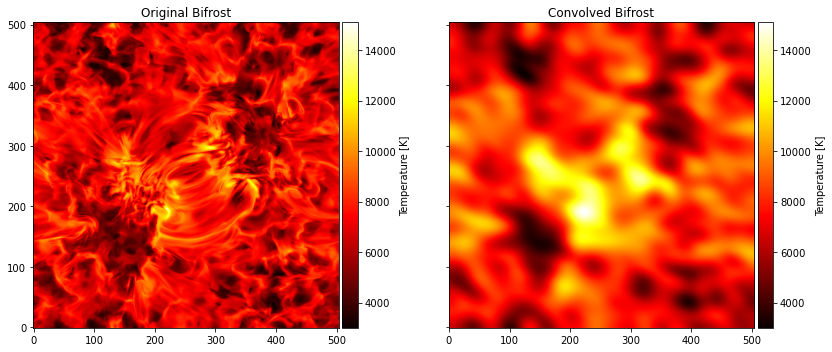

In [16]:
fig,ax = plt.subplots(ncols=2,figsize=(12,5),sharex=True,sharey=True)

imorg = ax[0].imshow(bifrostdata,origin='lower',cmap='hot')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cb = fig.colorbar(imorg, cax=cax, orientation='vertical',label=r'Temperature [K]')

imcon = ax[1].imshow(bifrostconv,origin='lower',cmap='hot')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cb = fig.colorbar(imorg, cax=cax, orientation='vertical',label=r'Temperature [K]')

ax[0].set_title(r'Original Bifrost')
ax[1].set_title(r'Convolved Bifrost')
plt.tight_layout()

## SALAT PREP_DATA

This function reduces the dimensions of the FITS saving a new one. The new FITS can be inspected with other softwares as CARTA

In [17]:
salat.salat_prep_data(file1)


------------------------------------------------------
------------ SALAT PREP DATA part of -------------
---- Solar Alma Library of Auxiliary Tools (SALAT)----

Done!
